# Required imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import h5py as h5
%matplotlib inline

plt.rcParams['figure.figsize'] = (8,6)
sns.set_palette('Dark2')
sns.set_style('whitegrid')

path_to_data = '../MillionSongSubset/'

# Reading SQL tables

Alternatively, there is a demo available at https://labrosa.ee.columbia.edu/millionsong/sites/default/files/tutorial1.py.txt that was made specifically for reading these files

In [6]:
con_simi = sqlite3.connect(path_to_data+'AdditionalFiles/subset_artist_similarity.db')
con_term = sqlite3.connect(path_to_data+'AdditionalFiles/subset_artist_term.db')
con_meta = sqlite3.connect(path_to_data+'AdditionalFiles/subset_track_metadata.db')

cur_simi = con_simi.cursor()
cur_term = con_term.cursor()
cur_meta = con_meta.cursor()

First we need to find out the table names in each of our files:

In [7]:
# subset_artist_similarity.db
res = con_simi.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    print(name[0])

artists
similarity


In [8]:
# subset_artist_term
res = con_term.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    print(name[0])

artists
terms
artist_term
mbtags
artist_mbtag


In [9]:
# subset_track_metadata
res = con_meta.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    print(name[0])

songs


# Exploring the tables

In [11]:
songs = pd.read_sql_query('SELECT * FROM songs WHERE year!=0',con_meta)

In [12]:
songs.head(5)

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year
0,TRACCVZ128F4291A8A,Deep Sea Creature,SOVLGJY12A8C13FBED,Call of the Mastodon,ARMQHX71187B9890D3,bc5e2ad6-0a4a-4d90-b911-e9a7e6861727,Mastodon,280.21506,0.780462,0.574275,2001
1,TRACCMH128F428E4CD,No Quieras Marcharte,SOGDQZK12A8C13F37C,Adelante,AR2PT4M1187FB55B1A,d54ea4a6-0b9c-4e47-bed0-289ae9ff4037,Los Chichos,191.68608,0.561590,0.420570,1984
2,TRACCVS12903D014F8,Ad Te Clamamus Exsvles Mortva Liberi,SOHCCIA12AC907577F,Pentagrammaton,ARZEWUR1187FB53DC8,0be59867-0da4-4e45-9b64-728cdf25487c,Enthroned,89.15546,0.593416,0.395710,2010
3,TRACCKS128F42B77AE,Murder One,SOBOAQC12A8C13E3E9,BTNHRESURRECTION,ARUZRFN1187B98AC05,2fa45bbb-0efb-4950-9d40-94bf23cbfec1,Bone Thugs-N-Harmony,255.73832,0.815923,0.555138,2000
4,TRACCJA128F149A144,Segredo,SODPNJR12A6D4FA52D,Joao Voz E Violato,AR3THYK1187B999F1F,286ec4c2-b5ca-4f85-b331-280a6d73dd14,João Gilberto,197.19791,0.645192,0.471224,2000


### Histogram of artist_hotttnesss

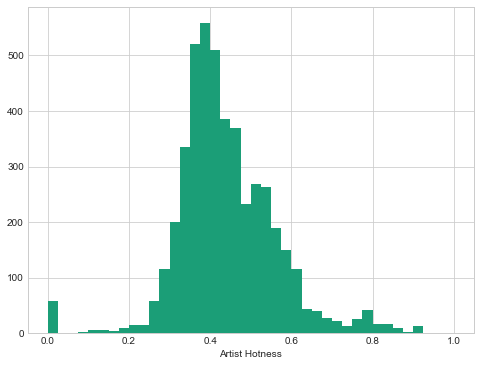

In [23]:
songs.artist_hotttnesss.hist(bins=np.linspace(0.0,1.0,41));
plt.xlabel('Artist Hotness')

### Scatter plots of artist_hotttnesss vs year

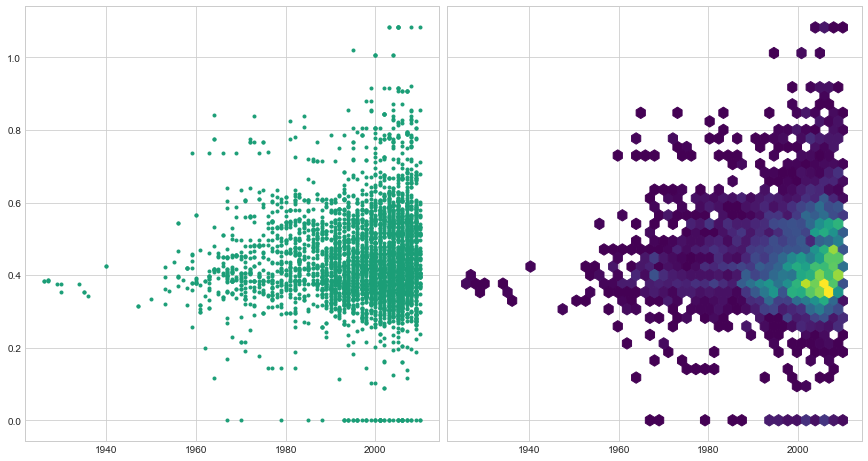

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,
                       figsize=(15,8))

ax[0].scatter(songs.year, songs.artist_hotttnesss, marker='.')

ax[1].hexbin(songs.year, songs.artist_hotttnesss, cmap='viridis', gridsize=41, mincnt=1.0)

plt.subplots_adjust(wspace=0.02);



### Scatter plots of artist_familiarity vs year compared to artist_hotttnesss vs year

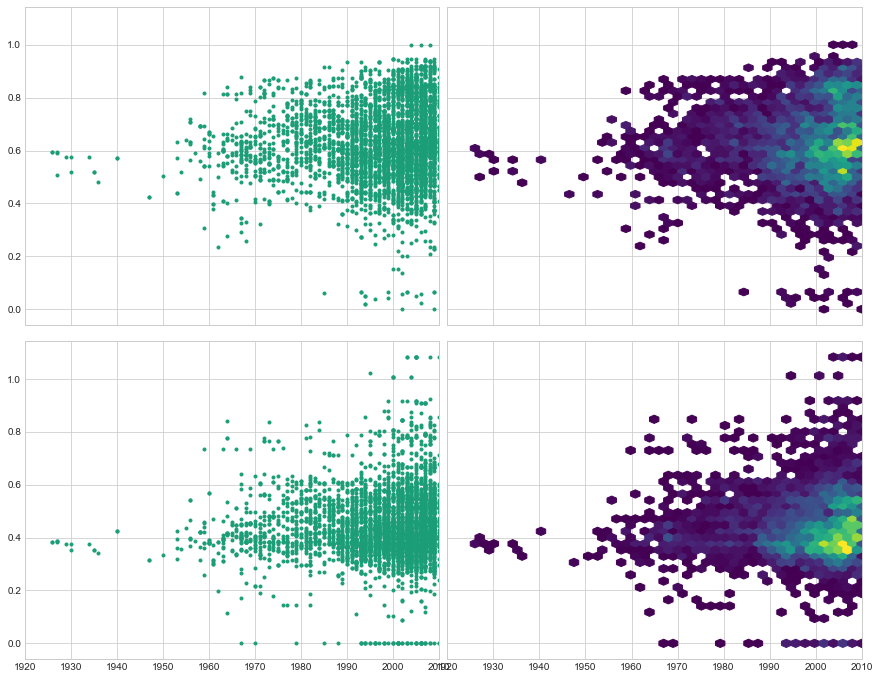

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,
                       figsize=(15,12))

ax[0,0].scatter(songs.year, songs.artist_familiarity, marker='.')
ax[0,1].hexbin(songs.year, songs.artist_familiarity, cmap='viridis', gridsize=41, mincnt=1.0)

ax[1,0].scatter(songs.year, songs.artist_hotttnesss, marker='.')
ax[1,1].hexbin(songs.year, songs.artist_hotttnesss, cmap='viridis', gridsize=41, mincnt=1.0)
ax[-1,-1].set_xlim(1920,songs.year.max());
plt.subplots_adjust(wspace=0.02, hspace=0.05)

### Artist_hotttnesss vs artist familiarity

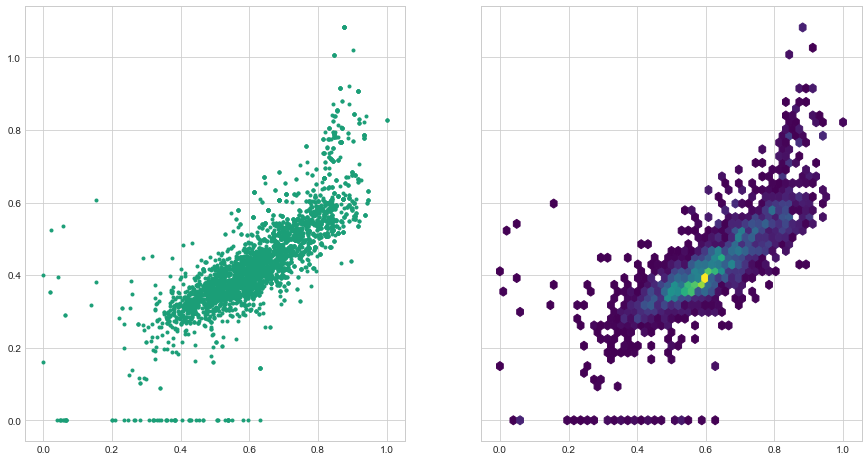

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,
                       figsize=(15,8))

ax[0].scatter(songs.artist_familiarity, songs.artist_hotttnesss, marker='.')
ax[1].hexbin(songs.artist_familiarity, songs.artist_hotttnesss, cmap='viridis', gridsize=51, mincnt=1.0)


### Artist_hotttnesss vs artist familiarity with a linear fit

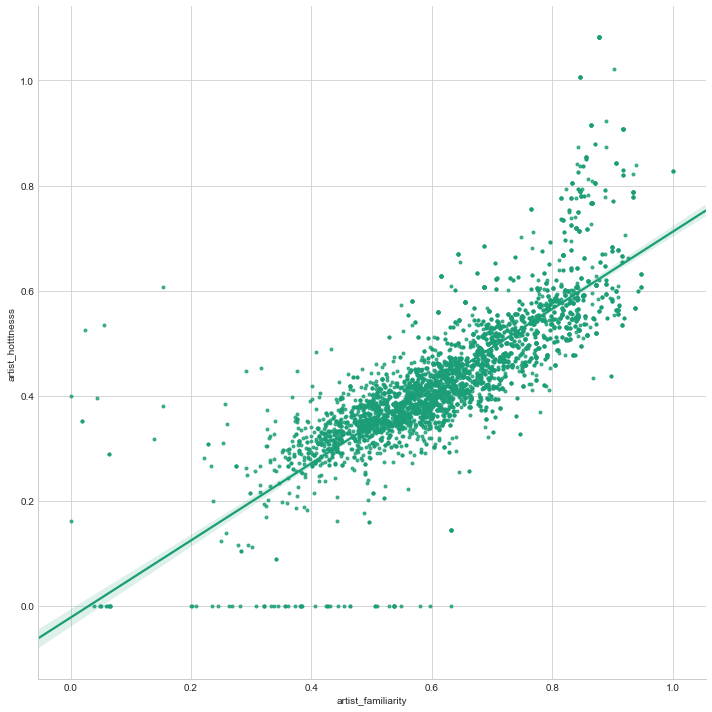

In [30]:
plt.subplots_adjust(wspace=0.02);
### Artist_hotttnesss vs artist familiarity
sns.lmplot(data=songs, x='artist_familiarity', y='artist_hotttnesss',
           markers='.', size=10);

### Artist_familiarity compared to artist_hotttnesss over time

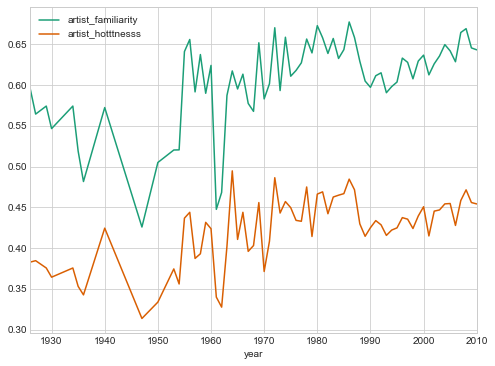

In [22]:
tmp = songs.groupby('year').mean()
tmp[['artist_familiarity','artist_hotttnesss']].plot();

# Reading HDF5 files

In [31]:
with pd.HDFStore(path_to_data+'AdditionalFiles/subset_msd_summary_file.h5') as store:
    print(store)
    analysis_summary = store.select('analysis/songs')
    metadata_summary = store.select('metadata/songs')
    musicbrainz_summary = store.select('musicbrainz/songs')                  

<class 'pandas.io.pytables.HDFStore'>
File path: ../MillionSongSubset/AdditionalFiles/subset_msd_summary_file.h5
/analysis/songs               frame_table [0.0.0] (typ->generic,nrows->10000,ncols->31,indexers->[index],dc->[analysis_sample_rate,audio_md5,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,idx_sections_confidence,idx_sections_start,idx_segments_confidence,idx_segments_loudness_max,idx_segments_loudness_max_time,idx_segments_loudness_start,idx_segments_pitches,idx_segments_start,idx_segments_timbre,idx_tatums_confidence,idx_tatums_start,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_id])
/metadata/songs               frame_table [0.0.0] (typ->generic,nrows->10000,ncols->20,indexers->[index],dc->[analyzer_version,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,a

In [32]:
analysis_summary.head()

,analysis_sample_rate,audio_md5,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,...,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_id
0,22050,a600d65cf157a306be60f26ecbf218f4,0.0,280.21506,0.238,0.0,0,0,0,0,...,5,0.555,-3.306,1,0.500,275.528,173.205,5,0.120,TRACCVZ128F4291A8A
1,22050,c64d75b0588e5ab552ee94548b50a4fa,0.0,191.68608,0.000,0.0,0,0,0,0,...,0,0.501,-10.764,1,0.710,184.128,150.955,4,0.600,TRACCMH128F428E4CD
2,22050,0cadd310865701bb93ced1cd78e8910a,0.0,222.92853,0.000,0.0,0,0,0,0,...,1,0.329,-9.035,1,0.407,216.300,93.056,4,1.000,TRACCSW128F148C7C3
3,22050,14be4fc1170152c445b3be7b8d18dfec,0.0,278.38649,0.496,0.0,0,0,0,0,...,7,0.313,-23.095,1,0.387,278.386,127.113,1,0.446,TRACCXJ128F428F0CF
4,22050,1def5d8298e8cb29a188a5a7c0e9429a,0.0,89.15546,4.847,0.0,0,0,0,0,...,2,0.000,-20.359,1,0.000,79.203,90.660,3,0.524,TRACCVS12903D014F8


In [33]:
metadata_summary.head()

,analyzer_version,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_name,artist_playmeid,genre,idx_artist_terms,idx_similar_artists,release,release_7digitalid,song_hotttnesss,song_id,title,track_7digitalid
0,,29785,0.780462,0.574275,ARMQHX71187B9890D3,NaN,"Atlanta, GA",NaN,bc5e2ad6-0a4a-4d90-b911-e9a7e6861727,Mastodon,-1,,0,0,Call of the Mastodon,223563,0.597641,SOVLGJY12A8C13FBED,Deep Sea Creature,2442524
1,,167867,0.561590,0.420570,AR2PT4M1187FB55B1A,NaN,,NaN,d54ea4a6-0b9c-4e47-bed0-289ae9ff4037,Los Chichos,1880,,0,0,Adelante,221677,NaN,SOGDQZK12A8C13F37C,No Quieras Marcharte,2423472
2,,7725,0.687687,0.406686,ARDI88R1187B98DAB2,NaN,,NaN,fd87374e-ffde-4d36-89a8-8a073f795666,Foxy Brown,-1,,0,0,Ill Na Na,47304,0.588922,SODMVJR12A6D4F985D,If I...,507029
3,,2799,0.391741,0.291265,ARUKJUP12086C14589,NaN,,NaN,8a5f2736-bcde-4a2e-8d50-72631d66a7ef,Ramón Vargas;Vladimir Jurowski,20111,,0,0,Massenet: Werther,295123,NaN,SOIWBDR12A8C13A4AC,Werther - Lyric Drama in four Acts/Act I/Alors...,3343102
4,,74269,0.593416,0.395710,ARZEWUR1187FB53DC8,50.45663,"Belgica -- Namur, Namur/Ghent, East Flanders",4.87137,0be59867-0da4-4e45-9b64-728cdf25487c,Enthroned,55656,,0,0,Pentagrammaton,785362,NaN,SOHCCIA12AC907577F,Ad Te Clamamus Exsvles Mortva Liberi,8688607


In [34]:
musicbrainz_summary.head()

,idx_artist_mbtags,year
0,0,2001
1,0,1984
2,0,0
3,0,0
4,0,2010
